In [1]:
from collections import namedtuple
import numpy as np

In [2]:
Data = namedtuple('Data', ['x', 'y', 'sy'])

In [3]:
data = Data(x=[30, 40, 50], y=[34.7, 35.5, 30.7], sy=[0.8, 1.2, 1.0])

In [4]:
X = np.matrix([[x**2, x, 1] for x in data.x])
Sy = np.diag([s**2 for s in data.sy])
y = np.array(data.y)

In [5]:
B = X.T.dot(X).I.dot(X.T).dot(y).A[0]; print(f'B = {B}')
S = np.sqrt(np.diag(X.T.dot(X).I.dot(X.T).dot(Sy).dot(X).dot(X.T.dot(X).I))); print(f'S = {S}')

B = [-0.028  2.04  -1.3  ]
S = [  1.36014705e-02   1.08337436e+00   2.05912603e+01]


In [6]:
maxloc = -B[1]/(2*B[0]); print(f'maxloc = {maxloc}')
maxval = -B[1]**2/(4*B[0]) + B[2]; print(f'maxval = {maxval}')

maxloc = 36.4285714285619
maxval = 35.857142857139756


In [7]:
maxunc = 1/(2 * B[0]**2) * np.sqrt(B[1]**2 * S[0]**2 + B[0]**2 * S[1]**2); print(f'maxunc = {maxunc}')

maxunc = 26.2184589666581


In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import matplotlib.pyplot as plt
def fcn(B, x):
    return B[0]*x**2 + B[1]*x + B[2]

(20, 40)

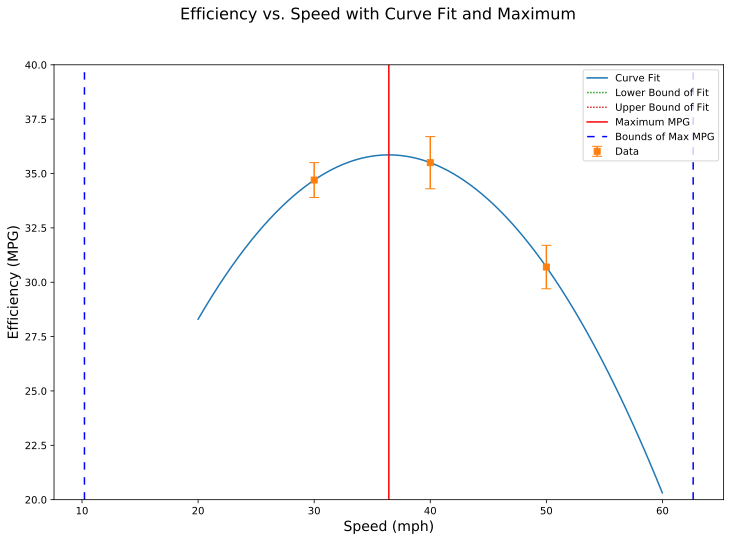

In [9]:
plt.figure(figsize=[12,8])
x = np.arange(20, 60, 0.01)
plt.plot(x, fcn(B, x), label='Curve Fit')
plt.errorbar(data.x, data.y, yerr=data.sy, fmt='s', capsize=5, label='Data')
plt.plot(x, fcn(B - S, x), dashes=[1], label='Lower Bound of Fit')
plt.plot(x, fcn(B + S, x), dashes=[1], label='Upper Bound of Fit')
plt.axvline(maxloc, color='r', label='Maximum MPG')
plt.axvline(maxloc - maxunc, color='b', dashes=[5], label='Bounds of Max MPG')
plt.axvline(maxloc + maxunc, color='b', dashes=[5])
plt.legend()
plt.xlabel('Speed (mph)', fontsize=14)
plt.ylabel('Efficiency (MPG)', fontsize=14)
plt.suptitle('Efficiency vs. Speed with Curve Fit and Maximum', fontsize=16)
plt.gca().set_ylim([20, 40])